In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from keras.preprocessing.image import ImageDataGenerator

In [2]:
pwd = %pwd
image_path = pwd + '/aug_test/'

files = os.listdir(image_path)

print(files)

['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg', 'dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg']


In [14]:
x = np.zeros((len(files), 128, 128, 3), dtype='float64')
count = 0
for f in files:
    img = Image.open(image_path + f)
    new_img = img.resize((128, 128))
    x[count] = np.asarray(new_img, dtype='float64')
    count = count + 1
    
print(x.shape)

(10, 128, 128, 3)


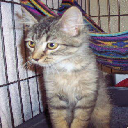

In [15]:
Image.fromarray(np.uint8(x[2]))

In [66]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    plt.show()

In [67]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(image_path + files[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

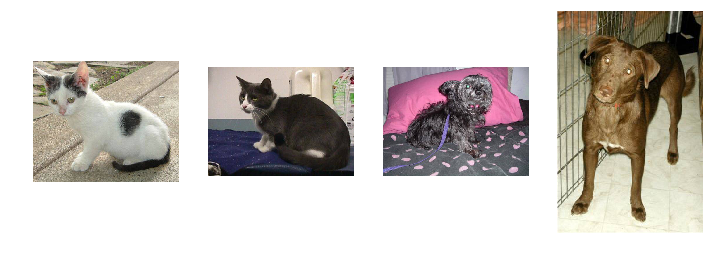

In [73]:
plots_idx(range(3,7))

In [83]:
datagen = ImageDataGenerator(zoom_range=0.5)

datagen.fit(x)

for X_batch in datagen.flow(x, batch_size=3):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i], cmap=plt.get_cmap('gray'))

    # show the plot
    plt.show()
    break

IndexError: index 3 is out of bounds for axis 0 with size 3